<a href="https://colab.research.google.com/github/juliaguardiani/AnaliseDeRedes/blob/main/Analise_de_Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidade Federal do Rio Grande do Norte**


---


Instituto Metrópole Digital


---


Prof. [Ivanovith Medeiros Dantas da Silva](https://github.com/ivanovitchm/network_analysis) 

IMD1155 - Análise de Redes 2021.1



Alunos:

 [Júlia Guardiani](https://github.com/juliaguardiani/), 20200000705

 Rafael Souza, 20190001097

 [Thaise Lima](https://github.com/ThaiseCoutinho/),  20190001159







In [ ]:
!pip install nxviz

In [ ]:
import pandas as pd
import networkx as nx
import pandas, sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

Index(['EMPRESA (SIGLA)', 'MES', 'AEROPORTO DE ORIGEM (UF)',
       'AEROPORTO DE DESTINO (REGIAO)', 'DISTANCIA'],
      dtype='object')


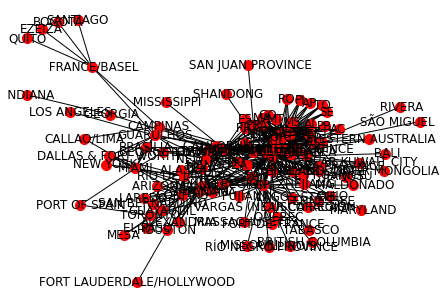

In [ ]:
g = pd.read_csv("https://raw.githubusercontent.com/ThaiseCoutinho/network_analysis_project3_unity1/main/resumo_anual_2020.csv") 
print(g.columns)
G=nx.from_pandas_edgelist(g, "AEROPORTO DE ORIGEM (UF)", "AEROPORTO DE DESTINO (REGIAO)", create_using=nx.Graph())
nx.draw(G, with_labels=True, node_size=100, node_color='red')

In [ ]:
nx.eccentricity(G)

{'  LAGOS STATE': 4,
 ' ALASKA': 4,
 ' ARIZONA': 4,
 ' BALI': 4,
 ' BRITISH COLUMBIA': 5,
 ' BUENOS AIRES PROVINCE': 4,
 ' CALIFORNIA': 4,
 ' CUSCO REGION': 4,
 ' CÓRDOBA PROVINCE': 4,
 ' ENGLAND': 4,
 ' FLORIDA': 3,
 ' FORT-DE-FRANCE': 5,
 ' FRANCE/BASEL': 5,
 ' FUJIAN': 5,
 ' GEORGIA': 4,
 ' GUANGDONG': 4,
 ' ILLINOIS': 5,
 ' INDIANA': 5,
 ' INNER MONGOLIA': 4,
 ' JIANGSU': 4,
 ' LIMA METROPOLITAN AREA': 4,
 ' MALDONADO': 5,
 ' MARYLAND': 5,
 ' MASSACHUSETTS': 5,
 ' MENDOZA PROVINCE': 4,
 ' MISSISSIPPI': 4,
 ' MISSOURI': 5,
 ' MONTEVIDEO': 4,
 ' NEAR AMSTERDAM': 4,
 ' NEAR KUWAIT CITY': 4,
 ' NEW YORK': 3,
 ' OHIO': 4,
 ' PUNO REGION': 5,
 ' QUEBEC': 5,
 ' RIVERA': 5,
 ' RÍO NEGRO PROVINCE': 5,
 ' SAN JUAN PROVINCE': 5,
 ' SANTA FE PROVINCE': 5,
 ' SHANDONG': 5,
 ' SÃO MIGUEL ISLAND': 5,
 ' TABASCO': 5,
 ' TENNESSEE': 4,
 ' TEXAS': 3,
 ' TRINIDAD': 4,
 ' VARGAS (NEAR CARACAS)': 5,
 ' WESTERN AUSTRALIA': 4,
 ' ZHEJIANG': 4,
 'AC': 4,
 'AL': 4,
 'ALEXANDRIA': 5,
 'AM': 4,
 'AP': 5,
 'B

In [ ]:
G.number_of_nodes()

108

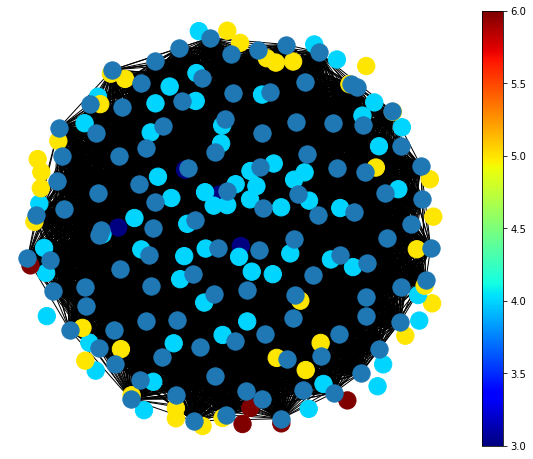

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
pos = nx.spring_layout(G,seed=123456789,k=1)
color = list(dict(nx.eccentricity(G)).values()) 
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)                      
er = nx.erdos_renyi_graph(108, 1)
nx.draw(er)
plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eccentricity.png', transparent=True,dpi=300)
plt.show()

In [ ]:
print("Diametro da rede (G): {}".format(nx.diameter(G)))
print([k for k,v in nx.eccentricity(G).items() if v == nx.diameter(G)])


Diametro da rede (G): 6
['FORT LAUDERDALE/HOLLYWOOD', 'EZEIZA', 'SANTIAGO', 'BOGOTÁ', 'QUITO']


In [ ]:
print("Raio da rede (G): {}".format(nx.radius(G)))
print([k for k,v in nx.eccentricity(G).items() if v == nx.radius(G)])

Raio da rede (G): 3
[' FLORIDA', ' NEW YORK', ' TEXAS', nan]


In [ ]:
nx.center(G)

[' FLORIDA', ' NEW YORK', ' TEXAS', nan]

In [ ]:
nx.degree_centrality(G)

In [ ]:
nx.betweenness_centrality(G)

In [ ]:
nx.closeness_centrality(G)

In [ ]:
nx.eigenvector_centrality(G)

In [ ]:
x = pd.read_csv("https://raw.githubusercontent.com/ThaiseCoutinho/network_analysis_project3_unity1/main/PDF1.csv") 
result = pd.concat([g, x], axis=1)
result=result.drop(columns=['MES', 'DISTANCIA'])
print(result.columns)

In [ ]:
fig=sns.PairGrid(result)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

In [ ]:
# O eigenvector centrality da rede em 2020
fig, ax = plt.subplots(2,2,figsize=(10,8))

# máximos valores das metricas 
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(G).items()]),
                      max([v for k, v in nx.degree_centrality(G).items()]),
                      max([v for k, v in nx.closeness_centrality(G).items()]),
                      max([v for k, v in nx.betweenness_centrality(G).items()])])

pos = nx.spring_layout(G,seed=123456789,k=0.3)

# cor ds nós
color_degree = list(dict(nx.degree_centrality(G)).values())
color_closeness = list(dict(nx.closeness_centrality(G)).values())
color_betweenness = list(dict(nx.betweenness_centrality(G)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(G)).values())

# 
# Criando arestas
#
# degree centrality
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# Criando nós
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

# 
# Criando rotulos
#
nx.draw_networkx_labels(G, pos=pos,
                        font_color='white', ax=ax[0,0])
nx.draw_networkx_labels(G, pos=pos,
                        font_color='white', ax=ax[0,1])
nx.draw_networkx_labels(G, pos=pos,
                        font_color='white', ax=ax[1,0])
nx.draw_networkx_labels(G, pos=pos,
                        font_color='white', ax=ax[1,1])
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centraliy")
ax[0,1].set_title("Closeness Centraliy")
ax[1,0].set_title("Betweenness Centraliy")
ax[1,1].set_title("Eigenvector Centraliy")



plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()


In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))
nx.number_of_selfloops(G)

In [ ]:
set([v for k,v in nx.core_number(G).items()])

In [ ]:
core = 1  #nucleo com a rede completa, cujo nó nãão está conectado ou conectado, pelo menos outro nó. 
for i in nx.k_core(G,core):
  print(i)

In [ ]:
core = 3  # nucleo com nós conectado, pelo menos, com três nós. 
for i in nx.k_core(G,core):
  print(i)

In [ ]:
core = 9  #nucleo "duro", onde não é possível eliminar mais nó 
for i in nx.k_core(G,core):
  print(i)

In [ ]:
shell = 9 #mesma ideia do 'core' não pode ser maior que (k+1)-core
for i in nx.k_shell(G,shell):
  print(i)

In [ ]:
plt.style.use("default")
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Histograma do grau")
ax[0].set_ylabel("Valor")
ax[0].set_xlabel("Grau")

ax[1].set_title("Função de densidade de Probabilidade")
ax[1].set_ylabel("Probabilidade")
ax[1].set_xlabel("Grau")

plt.tight_layout()
plt.show()

In [ ]:
# O grau da rede de aeroportos 2020
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Encontrando k-nucleos, usamos o terceiro e o nono
G_core_3 = nx.k_shell(G, 3)
G_core_9 = nx.k_core(G, 9)

# Descrever a posição
pos = nx.spring_layout(G,seed=123456789,k=0.3)

# mostrar as arestas
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# mostrar os nós
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color="#333333")

nodes = nx.draw_networkx_nodes(G_core_3,
                 pos=pos,
                 node_color="green")

nodes = nx.draw_networkx_nodes(G_core_9,
                 pos=pos,
                 node_color="red")

# Legenda
red_patch = mpatches.Patch(color='green', label='9-core')
blue_patch = mpatches.Patch(color='blue', label='3-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()

Fazendo o mesmo procedimento para a tabela do ano de 2021, segue o código.

Index(['EMPRESA (SIGLA)', 'MES', 'AEROPORTO DE ORIGEM (UF)',
       'AEROPORTO DE DESTINO (REGIAO)', 'DISTANCIA'],
      dtype='object')


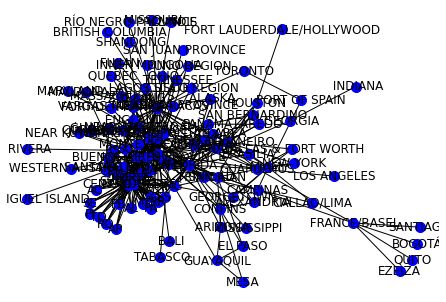

In [ ]:
g2 = pd.read_csv("https://raw.githubusercontent.com/ThaiseCoutinho/network_analysis_project3_unity1/main/resumo_anual_2021.csv") # Ler o csv
print(g2.columns)   #Mostra as colunas
G2=nx.from_pandas_edgelist(g, "AEROPORTO DE ORIGEM (UF)", "AEROPORTO DE DESTINO (REGIAO)", create_using=nx.Graph()) #Cria o gráfico
nx.draw(G2, with_labels=True, node_size=100, node_color='blue') #imprime na cor azul

In [ ]:
nx.eccentricity(G2)

In [ ]:
print("Diametro da rede (G2): {}".format(nx.diameter(G2)))
print([k for k,v in nx.eccentricity(G2).items() if v == nx.diameter(G2)])

Diametro da rede (G2): 6
['FORT LAUDERDALE/HOLLYWOOD', 'EZEIZA', 'SANTIAGO', 'BOGOTÁ', 'QUITO']


In [ ]:
G2.number_of_nodes()

108

In [ ]:
nx.center(G2)

[' FLORIDA', ' NEW YORK', ' TEXAS', nan]

In [ ]:
nx.degree_centrality(G2)

In [ ]:
nx.betweenness_centrality(G2)

In [ ]:
nx.closeness_centrality(G2)

In [ ]:
nx.eigenvector_centrality(G2)

In [ ]:
# O eigenvector centrality da rede em 2021
fig, ax = plt.subplots(2,2,figsize=(10,8))

# valores maximos das metricas 
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(G2).items()]),
                      max([v for k, v in nx.degree_centrality(G2).items()]),
                      max([v for k, v in nx.closeness_centrality(G2).items()]),
                      max([v for k, v in nx.betweenness_centrality(G2).items()])])


pos = nx.spring_layout(G2,seed=123456789,k=0.3)

# cor dos nós
color_degree = list(dict(nx.degree_centrality(G2)).values())
color_closeness = list(dict(nx.closeness_centrality(G2)).values())
color_betweenness = list(dict(nx.betweenness_centrality(G2)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(G2)).values())

# 
# Criando arestas
#
# degree centralit2y
nx.draw_networkx_edges(G2,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(G2,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(G2,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(G2,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# draw nodes
nodes = nx.draw_networkx_nodes(G2,
                 pos=pos,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(G2,
                 pos=pos,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(G2,
                 pos=pos,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(G2,
                 pos=pos,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

# 
# draw labels
#
nx.draw_networkx_labels(G2, pos=pos,
                        font_color='white', ax=ax[0,0])
nx.draw_networkx_labels(G2, pos=pos,
                        font_color='white', ax=ax[0,1])
nx.draw_networkx_labels(G2, pos=pos,
                        font_color='white', ax=ax[1,0])
nx.draw_networkx_labels(G2, pos=pos,
                        font_color='white', ax=ax[1,1])

ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centraliy")
ax[0,1].set_title("Closeness Centraliy")
ax[1,0].set_title("Betweenness Centraliy")
ax[1,1].set_title("Eigenvector Centraliy")


plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

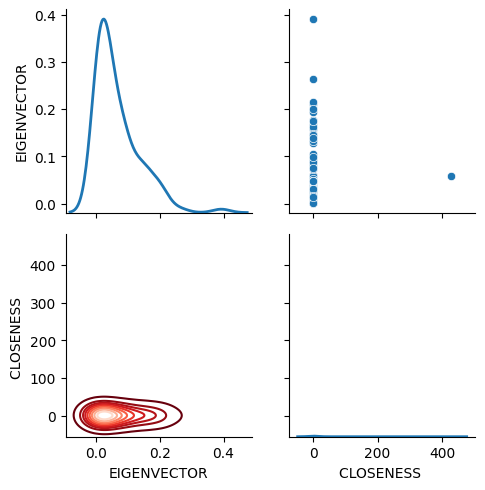

In [ ]:
fig=sns.PairGrid(result)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

In [ ]:
# O grau da rede em 2021
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Posiçãão
pos = nx.spring_layout(G2,seed=123456789,k=0.3)
# cor do nó
color = list(dict(nx.degree(G2)).values())

# arestas
nx.draw_networkx_edges(G2,
                       pos=pos,
                       alpha=0.4, ax=ax)

# nó
nodes = nx.draw_networkx_nodes(G2,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# rotulos
nx.draw_networkx_labels(G2, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('sociopatterns.png', transparent=True,dpi=600)
plt.show()

In [ ]:
G2.remove_edges_from(nx.selfloop_edges(G2)) # Removendo os loops entre os nós (self loops)
nx.number_of_selfloops(G)

In [ ]:
set([v for k,v in nx.core_number(G2).items()]) # quantidade de núcleos

In [ ]:
len([G2.degree(node) for node in list(nx.k_core(G2,1))])

In [ ]:
a = [node for node in list(nx.k_core(G2,8))]  #nó da tabela de 2021 na região mais próxima do núcleo
b = [node for node in list(nx.k_core(G2,9))]  #nó da tabela de 2021 na região do núcleo
np.setxor1d(a,b) #mostrar os nós

In [ ]:
print(list(nx.k_shell(G2,5))) #mostra todos os nos do k-shell, no nosso caso, k=5

In [ ]:
plt.style.use("default")
# Grau
degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Histograma do Grau")
ax[0].set_ylabel("Valor")
ax[0].set_xlabel("Grau")

ax[1].set_title("Função de densidade de Probabilidade")
ax[1].set_ylabel("Probabilidade")
ax[1].set_xlabel("Grau")

plt.tight_layout()
plt.show()

In [ ]:
# O grau da rede de aeroportos 2021
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Encontrando k-nucleos, usamos o terceiro e o nono
G2_core_3 = nx.k_shell(G2, 3)
G2_core_9 = nx.k_core(G2, 9)

# Descrever a posição
pos = nx.spring_layout(G2,seed=123456789,k=0.3)

# mostrar as arestas
nx.draw_networkx_edges(G2,
                       pos=pos,
                       alpha=0.4, ax=ax)

# mostrar os nós
nodes = nx.draw_networkx_nodes(G2,
                 pos=pos,
                 node_color="#333333")

nodes = nx.draw_networkx_nodes(G2_core_3,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(G2_core_9,
                 pos=pos,
                 node_color="red")

# Legenda
red_patch = mpatches.Patch(color='red', label='9-core')
blue_patch = mpatches.Patch(color='blue', label='3-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()